<a href="https://www.kaggle.com/code/tridibraj/traffic-volume-forecasting-with-lstm-and-eda-test?scriptVersionId=188074015" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

# Load the original dataset
file_path = '/kaggle/input/traffic-prediction-dataset/traffic.csv'
df = pd.read_csv(file_path)

# Check for missing values
missing_values = df.isnull().sum()

# Check data types
data_types = df.dtypes

# Check columns
columns = df.columns

# Display the information
print("Missing values in each column:\n", missing_values)
print("\nData types of each column:\n", data_types)
print("\nColumn names:\n", columns)


Missing values in each column:
 DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

Data types of each column:
 DateTime    object
Junction     int64
Vehicles     int64
ID           int64
dtype: object

Column names:
 Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')


In [2]:
# Check for unique junctions
unique_junctions = df['Junction'].unique()
num_unique_junctions = len(unique_junctions)

# Display the number of unique junctions and their names
print("Number of unique junctions:", num_unique_junctions)
print("Unique junctions:\n", unique_junctions)

Number of unique junctions: 4
Unique junctions:
 [1 2 3 4]



EDA for Junction 1


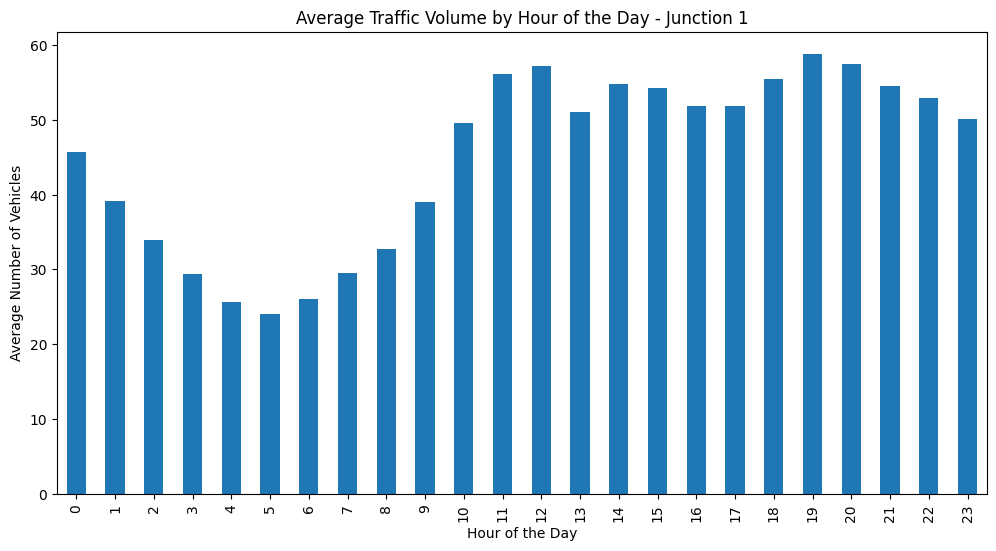

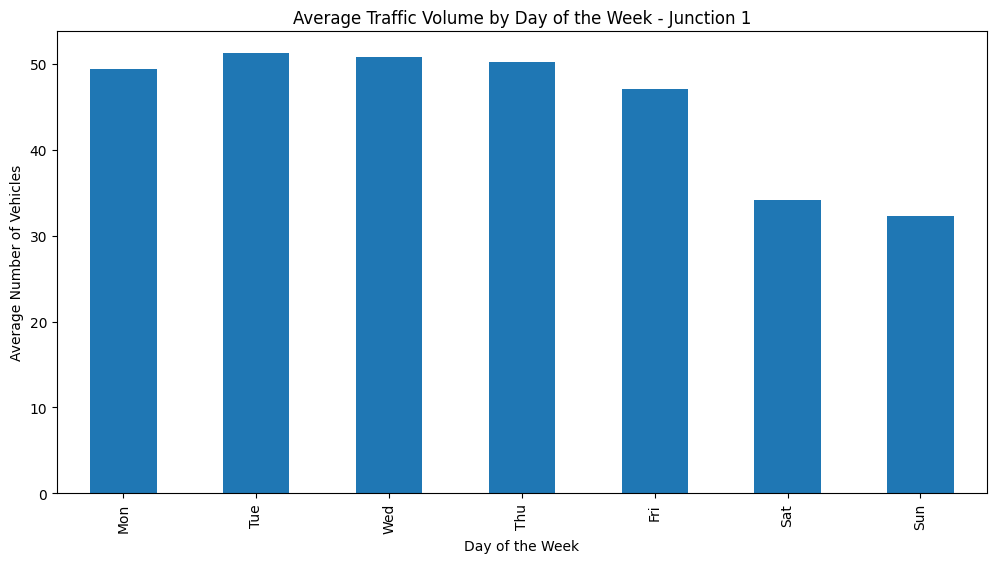

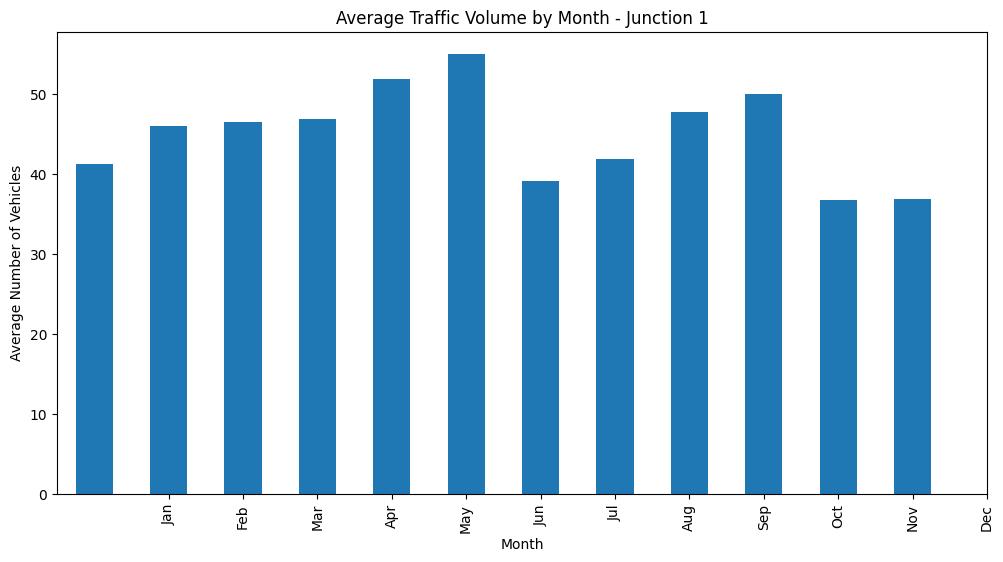

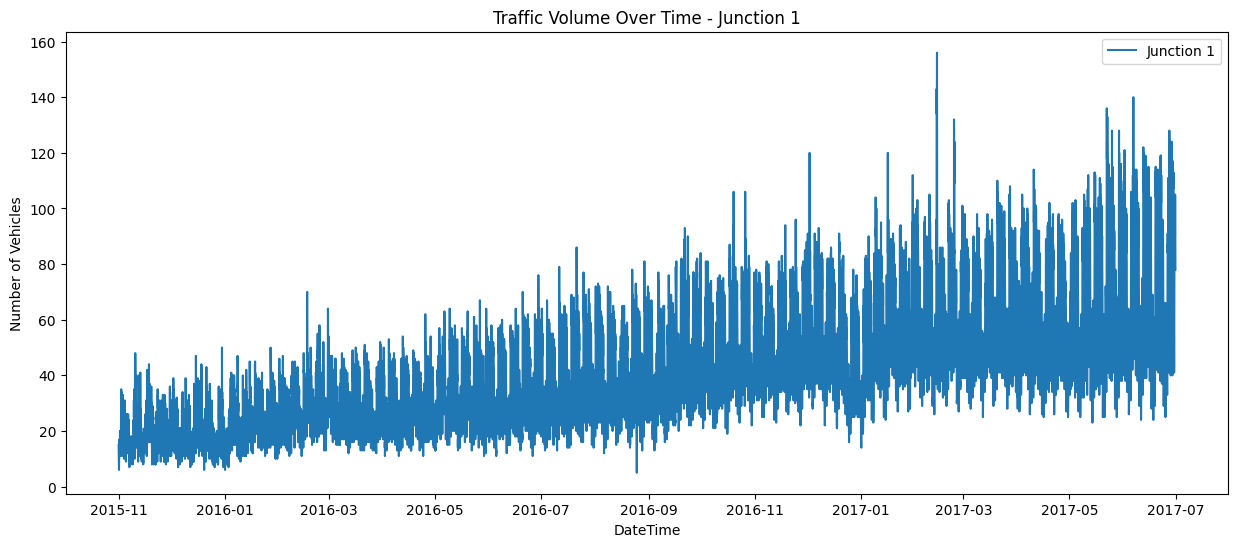

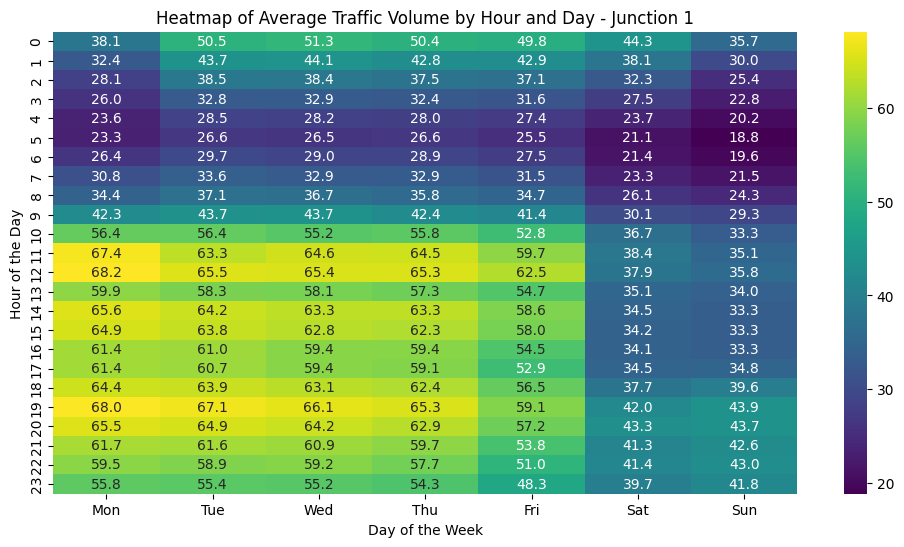


EDA for Junction 2


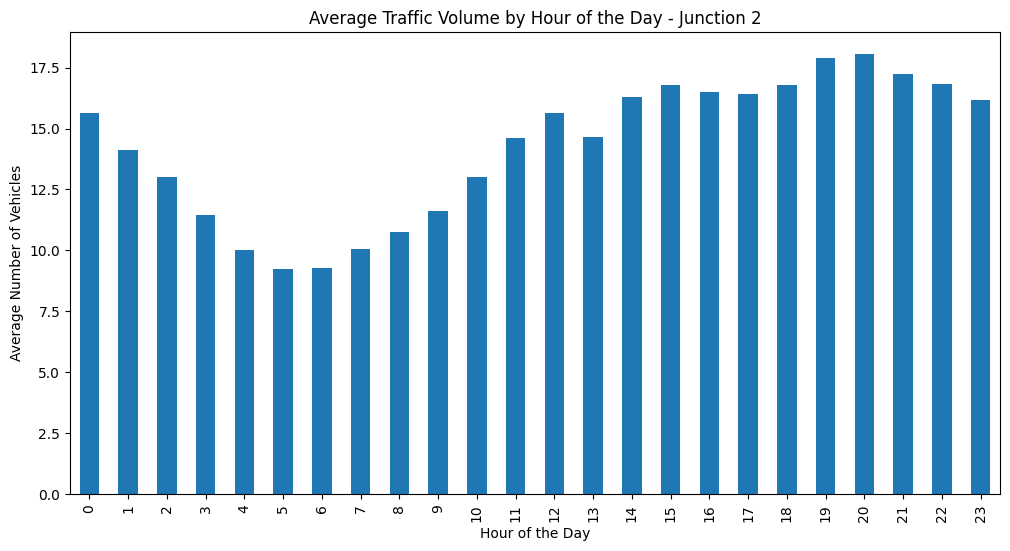

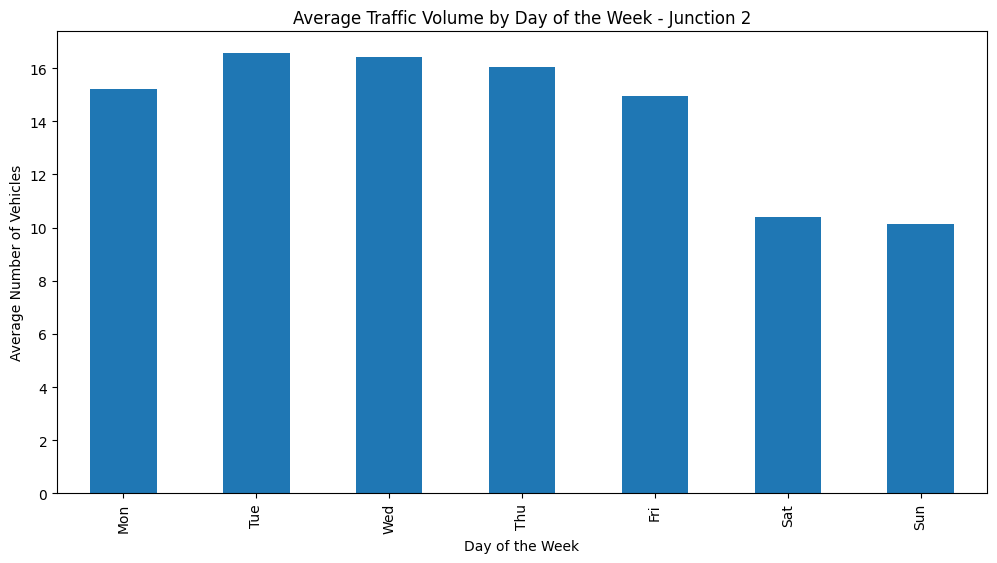

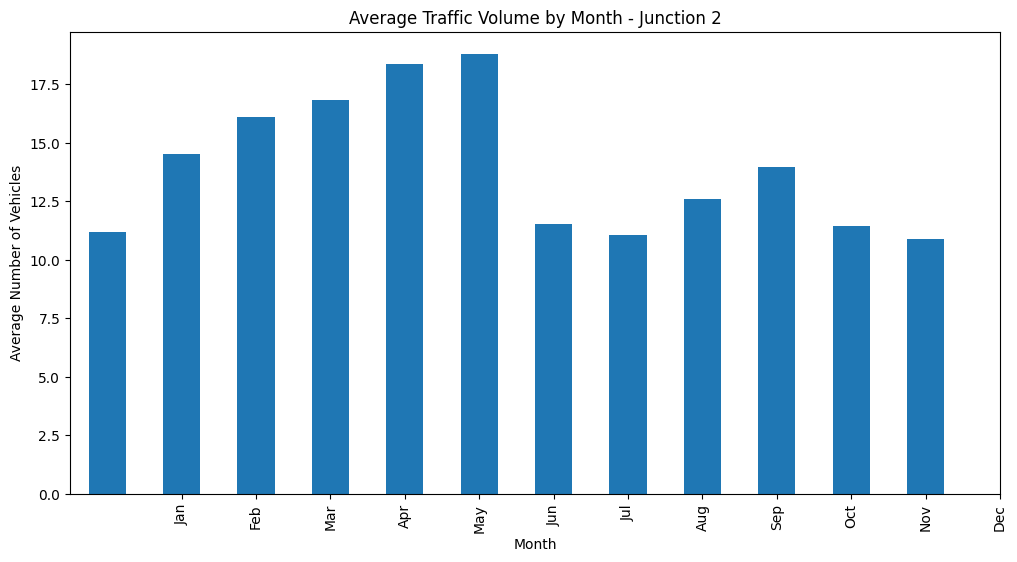

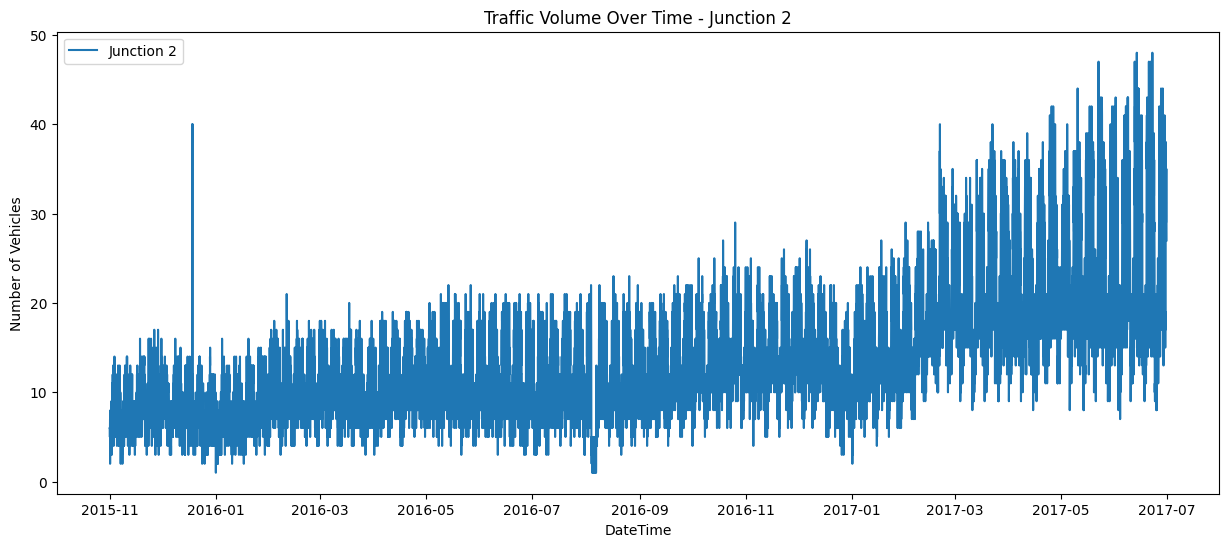

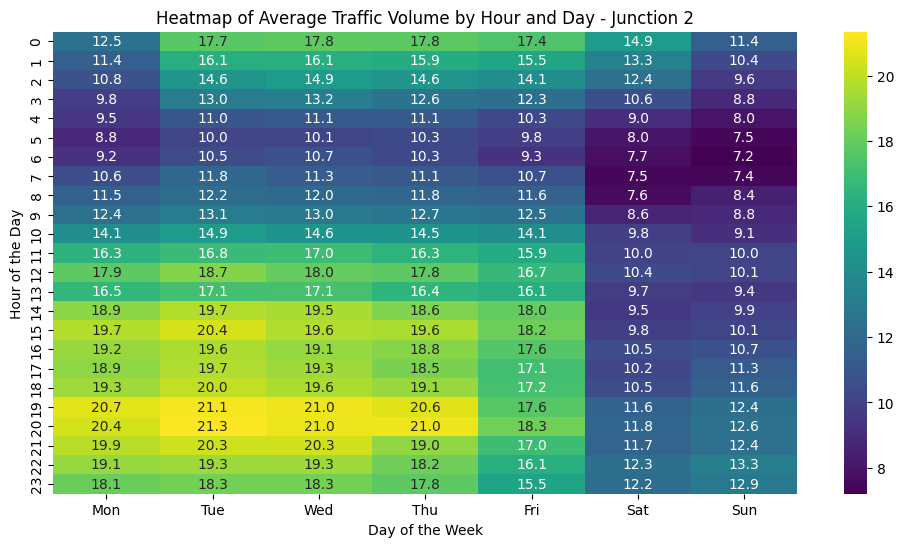


EDA for Junction 3


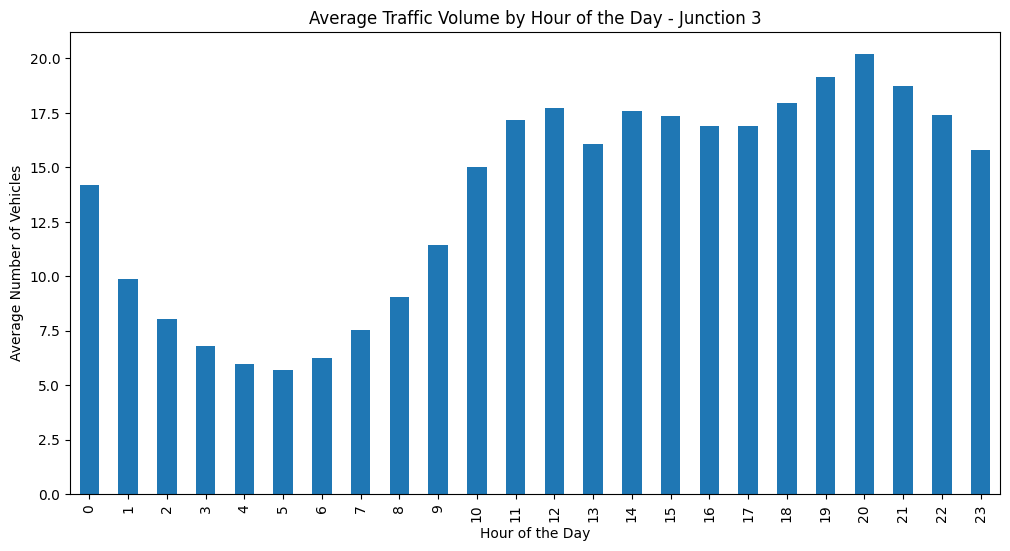

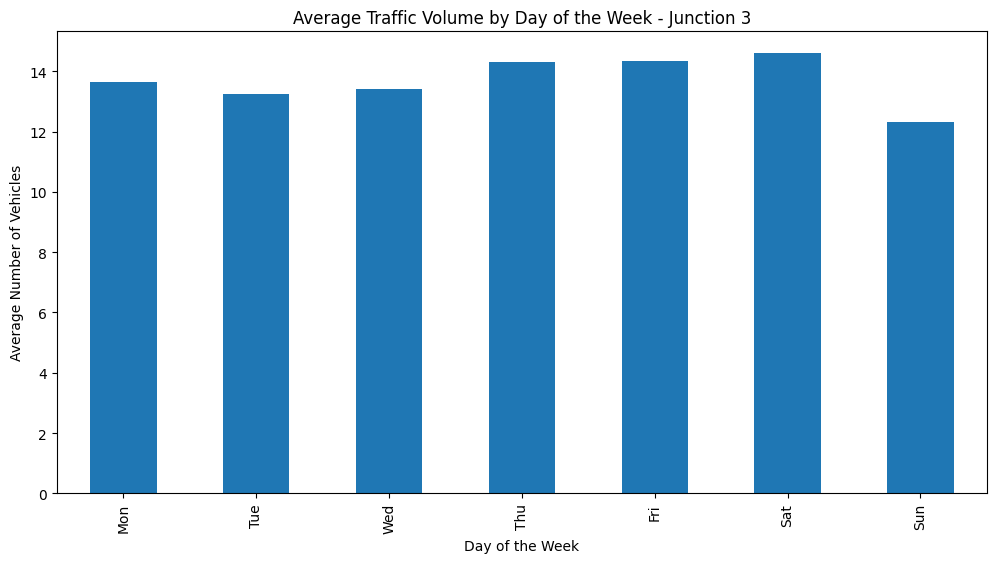

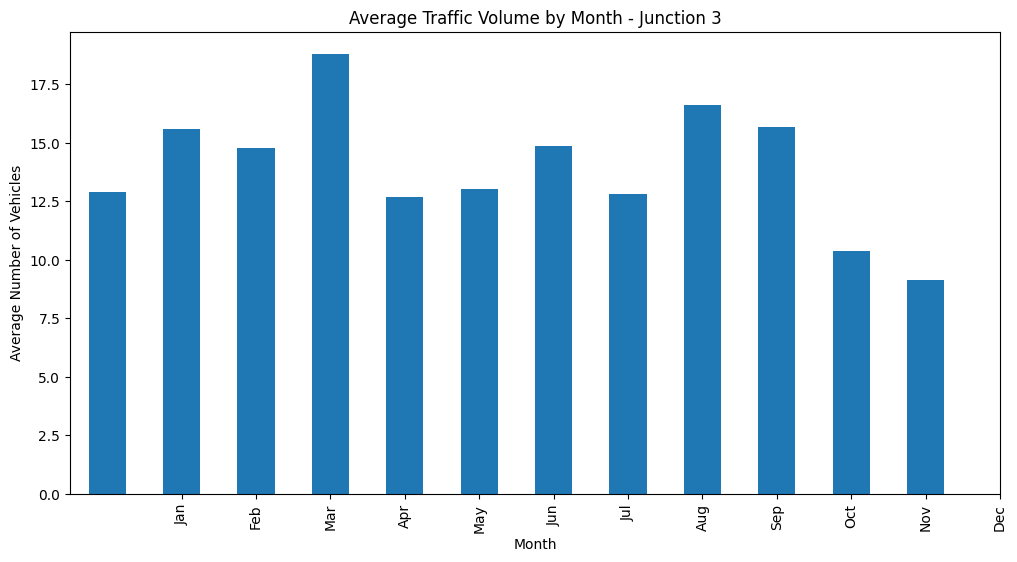

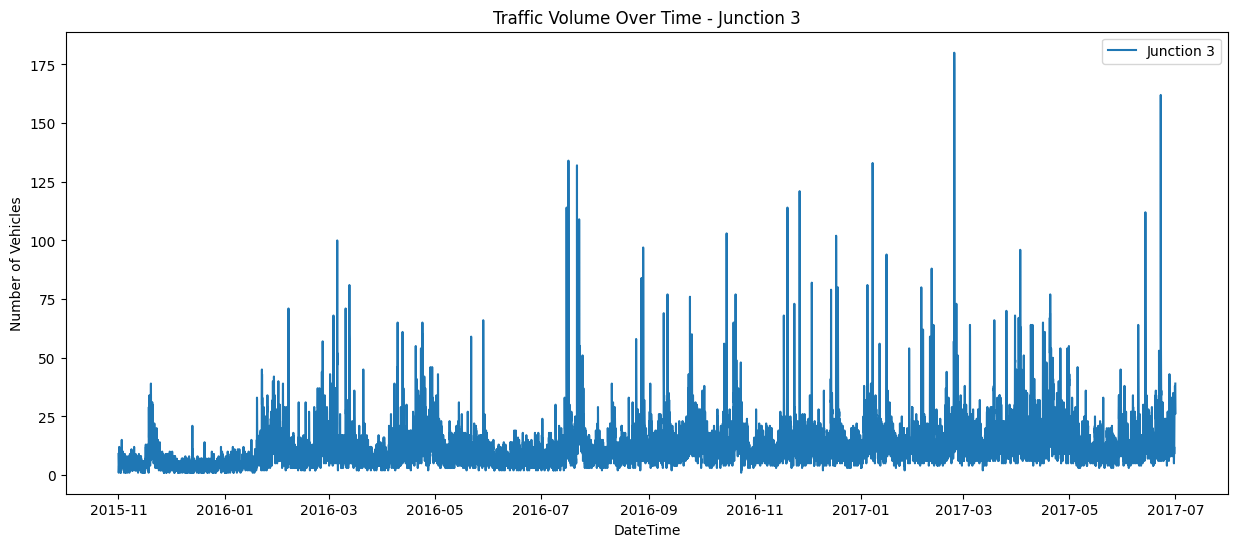

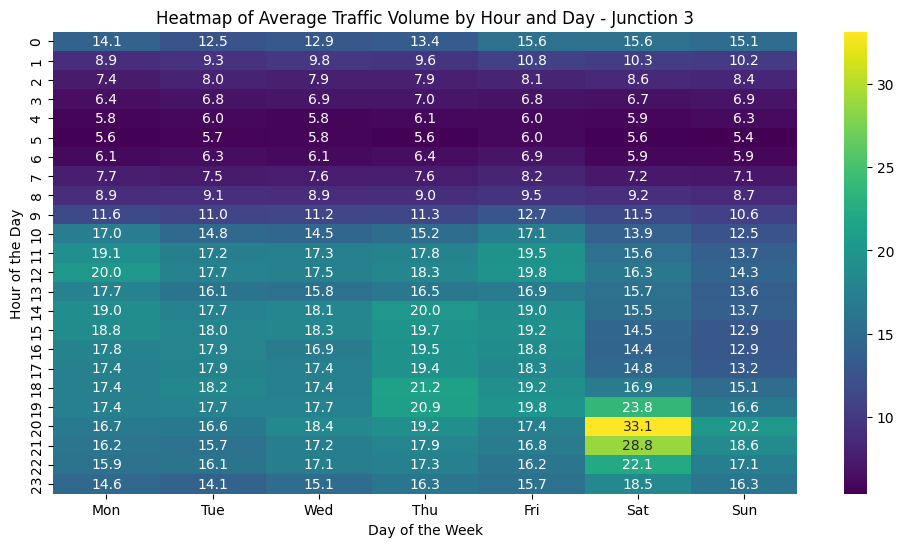


EDA for Junction 4


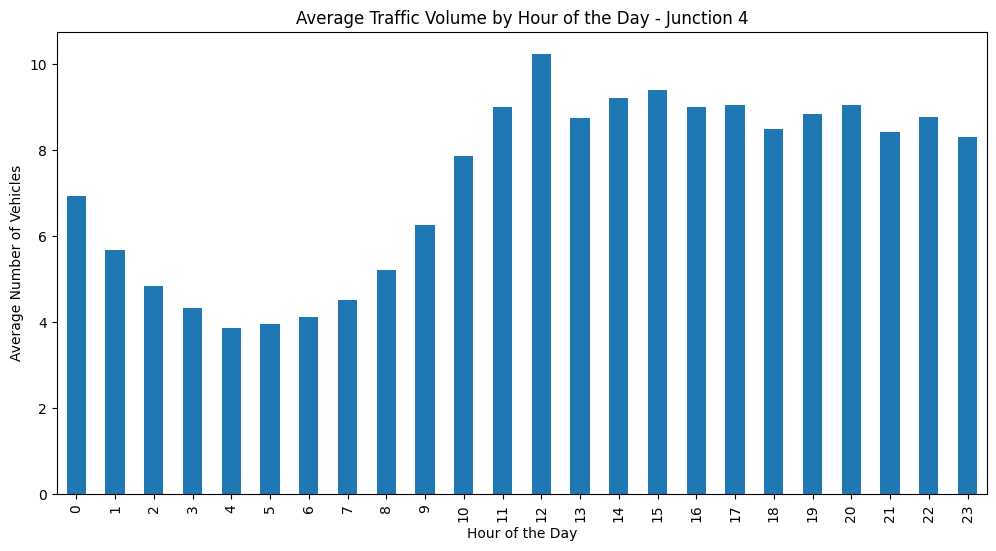

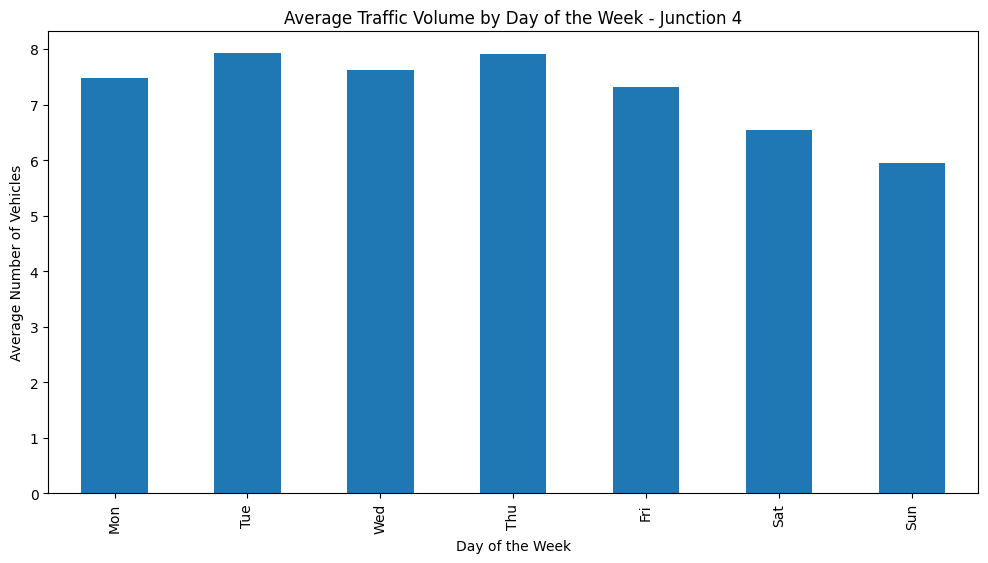

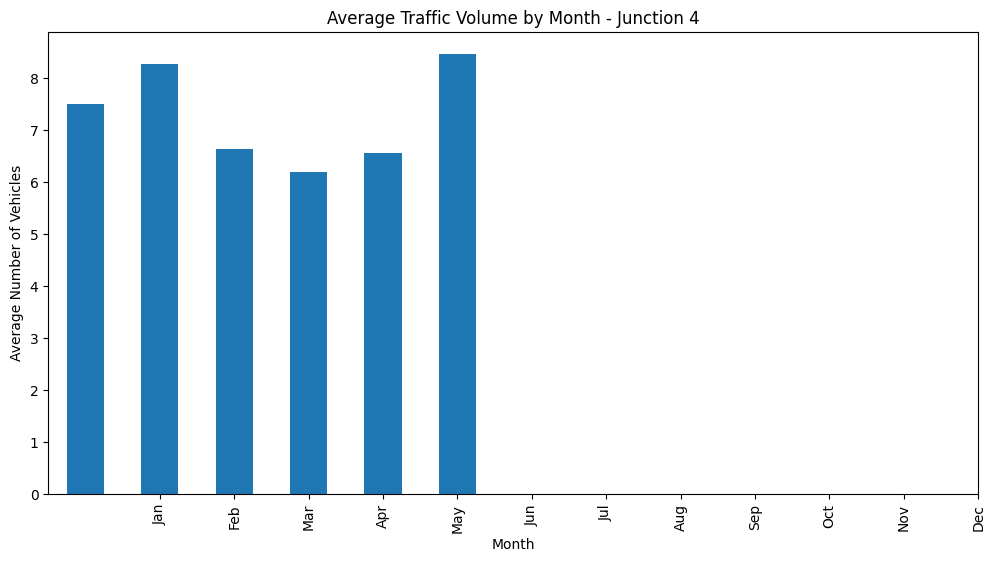

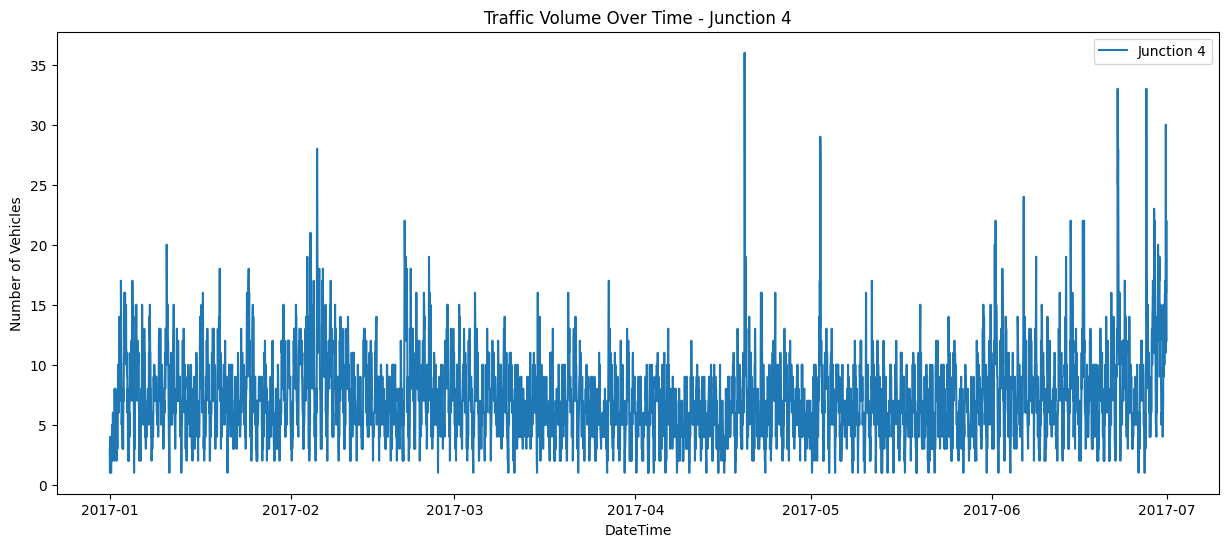

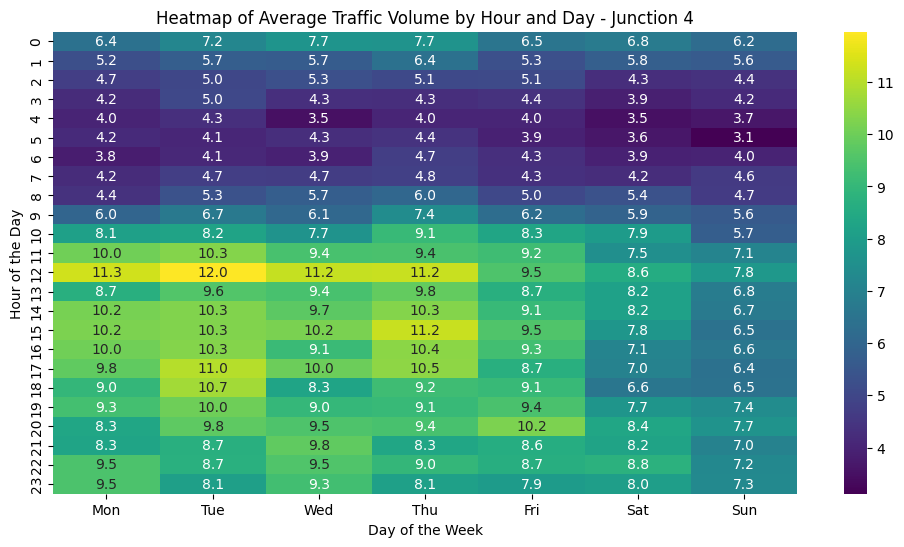

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert the DateTime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

# Extract time-related features
df['hour'] = df['DateTime'].dt.hour
df['day_of_week'] = df['DateTime'].dt.dayofweek
df['month'] = df['DateTime'].dt.month
df['year'] = df['DateTime'].dt.year

# Get the unique junctions
unique_junctions = df['Junction'].unique()

# Perform EDA for each junction
for junction in unique_junctions:
    print(f"\nEDA for Junction {junction}")
    
    # Filter data for the junction
    df_junction = df[df['Junction'] == junction]
    
    # Traffic patterns by hour of the day
    plt.figure(figsize=(12, 6))
    df_junction.groupby('hour')['Vehicles'].mean().plot(kind='bar')
    plt.title(f'Average Traffic Volume by Hour of the Day - Junction {junction}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Number of Vehicles')
    plt.show()

    # Traffic patterns by day of the week
    plt.figure(figsize=(12, 6))
    df_junction.groupby('day_of_week')['Vehicles'].mean().plot(kind='bar')
    plt.title(f'Average Traffic Volume by Day of the Week - Junction {junction}')
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Number of Vehicles')
    plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.show()

    # Traffic patterns by month
    plt.figure(figsize=(12, 6))
    df_junction.groupby('month')['Vehicles'].mean().plot(kind='bar')
    plt.title(f'Average Traffic Volume by Month - Junction {junction}')
    plt.xlabel('Month')
    plt.ylabel('Average Number of Vehicles')
    plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

    # Time series plot for the junction
    plt.figure(figsize=(15, 6))
    plt.plot(df_junction['DateTime'], df_junction['Vehicles'], label=f'Junction {junction}')
    plt.title(f'Traffic Volume Over Time - Junction {junction}')
    plt.xlabel('DateTime')
    plt.ylabel('Number of Vehicles')
    plt.legend()
    plt.show()

    # Heatmap of traffic volume by hour of the day and day of the week
    heatmap_data = df_junction.groupby(['hour', 'day_of_week'])['Vehicles'].mean().unstack()
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f")
    plt.title(f'Heatmap of Average Traffic Volume by Hour and Day - Junction {junction}')
    plt.xlabel('Day of the Week')
    plt.ylabel('Hour of the Day')
    plt.xticks(ticks=np.arange(7) + 0.5, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.show()


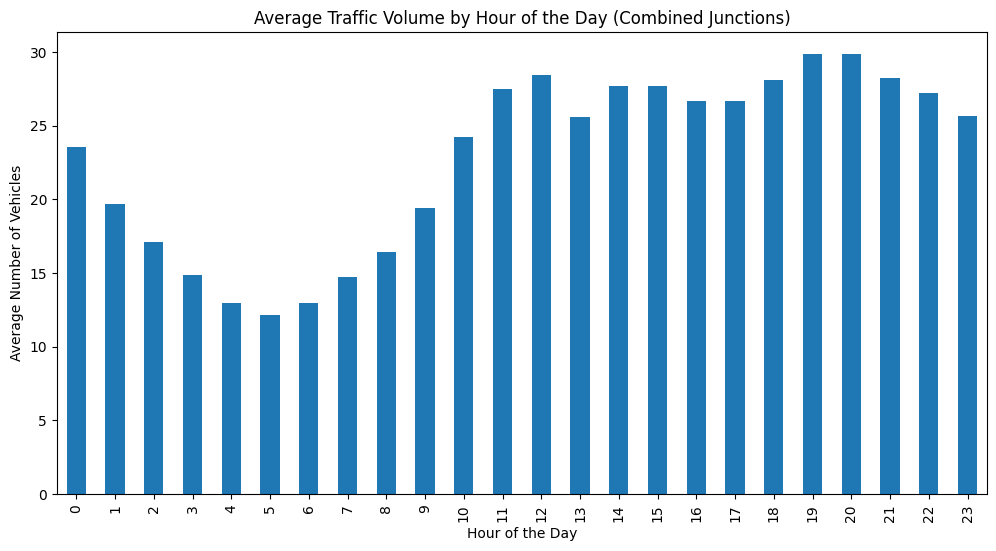

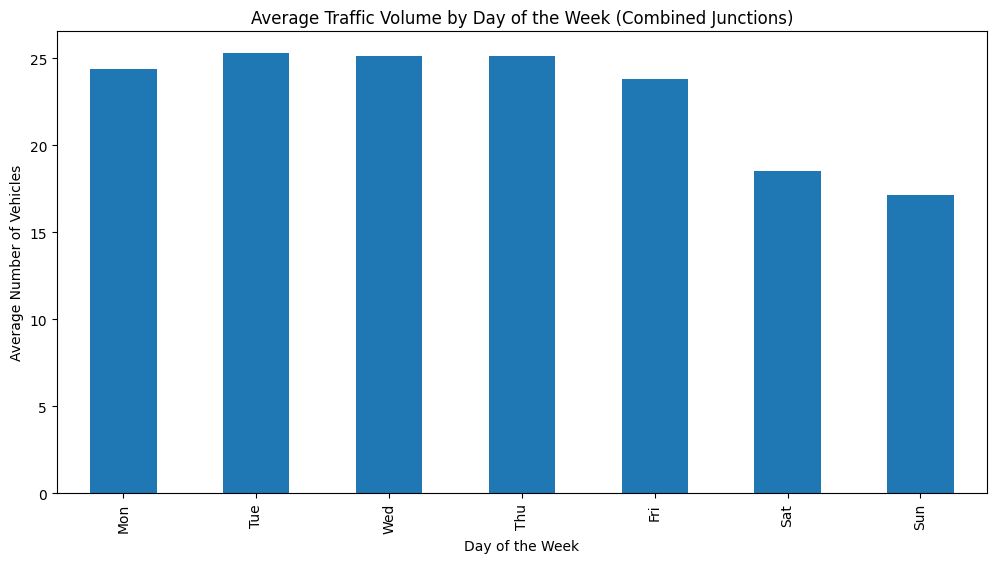

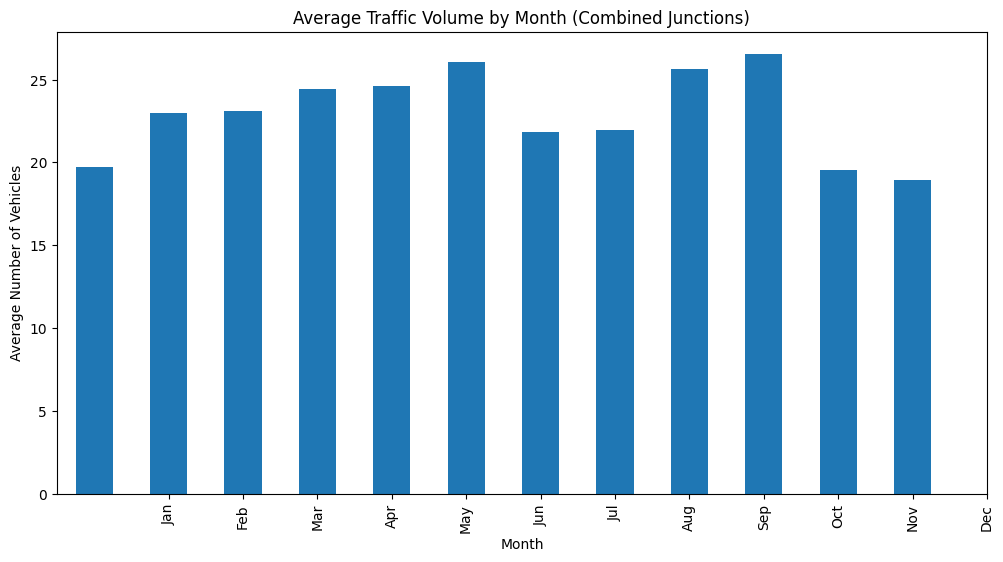

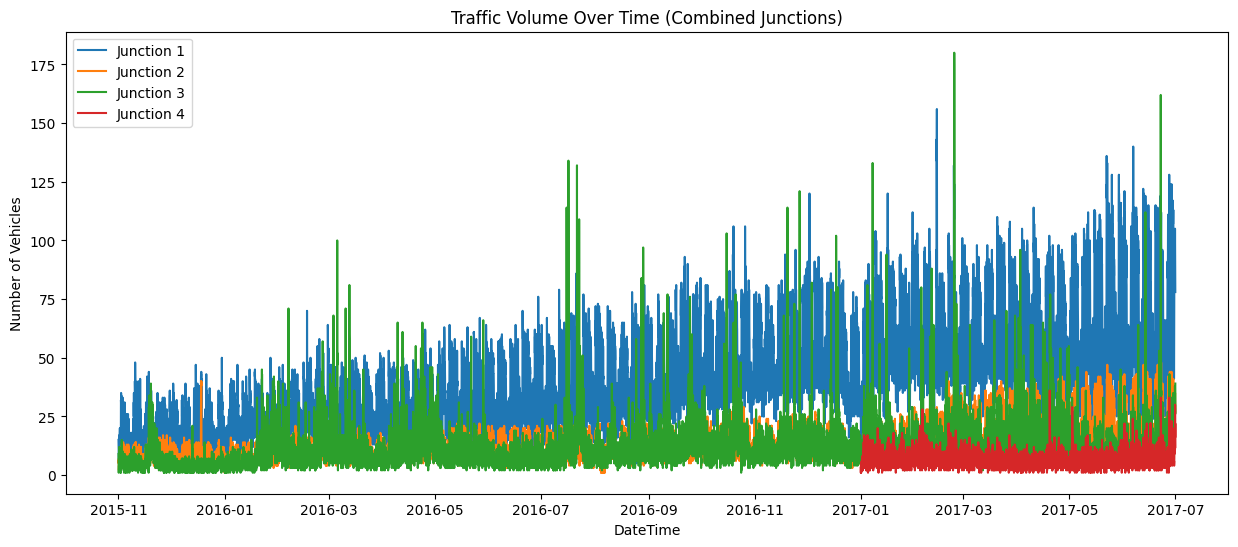

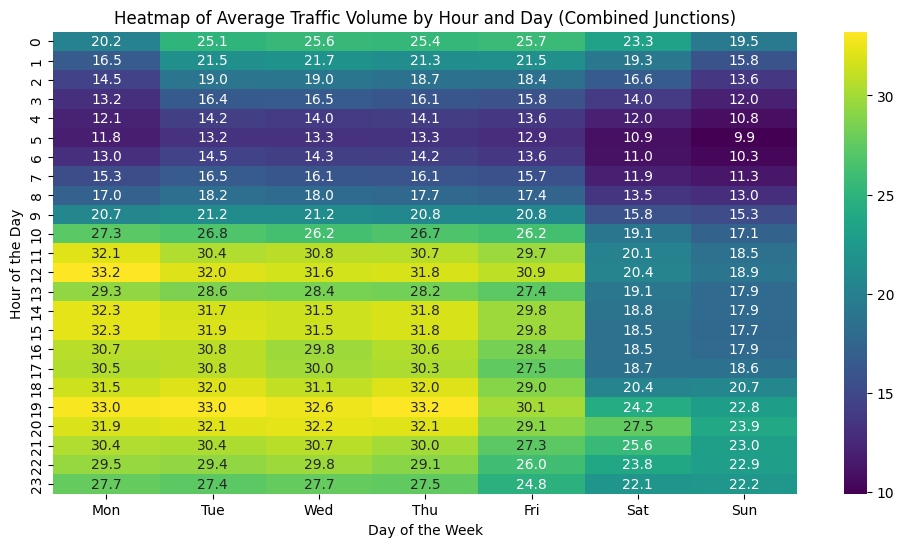

In [4]:


# Extract time-related features
df['hour'] = df['DateTime'].dt.hour
df['day_of_week'] = df['DateTime'].dt.dayofweek
df['month'] = df['DateTime'].dt.month
df['year'] = df['DateTime'].dt.year

# Traffic patterns by hour of the day (combined junctions)
plt.figure(figsize=(12, 6))
df.groupby('hour')['Vehicles'].mean().plot(kind='bar')
plt.title('Average Traffic Volume by Hour of the Day (Combined Junctions)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Vehicles')
plt.show()

# Traffic patterns by day of the week (combined junctions)
plt.figure(figsize=(12, 6))
df.groupby('day_of_week')['Vehicles'].mean().plot(kind='bar')
plt.title('Average Traffic Volume by Day of the Week (Combined Junctions)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Vehicles')
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Traffic patterns by month (combined junctions)
plt.figure(figsize=(12, 6))
df.groupby('month')['Vehicles'].mean().plot(kind='bar')
plt.title('Average Traffic Volume by Month (Combined Junctions)')
plt.xlabel('Month')
plt.ylabel('Average Number of Vehicles')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Time series plot for combined junctions
plt.figure(figsize=(15, 6))
for junction in df['Junction'].unique():
    plt.plot(df[df['Junction'] == junction]['DateTime'], df[df['Junction'] == junction]['Vehicles'], label=f'Junction {junction}')
plt.title('Traffic Volume Over Time (Combined Junctions)')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

# Heatmap of traffic volume by hour of the day and day of the week (combined junctions)
heatmap_data = df.groupby(['hour', 'day_of_week'])['Vehicles'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f")
plt.title('Heatmap of Average Traffic Volume by Hour and Day (Combined Junctions)')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.xticks(ticks=np.arange(7) + 0.5, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


In [5]:


# Convert the DateTime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

# Set DateTime as the index
df.set_index('DateTime', inplace=True)

# Check the data structure
print(df.head())


                     Junction  Vehicles           ID  hour  day_of_week  \
DateTime                                                                  
2015-11-01 00:00:00         1        15  20151101001     0            6   
2015-11-01 01:00:00         1        13  20151101011     1            6   
2015-11-01 02:00:00         1        10  20151101021     2            6   
2015-11-01 03:00:00         1         7  20151101031     3            6   
2015-11-01 04:00:00         1         9  20151101041     4            6   

                     month  year  
DateTime                          
2015-11-01 00:00:00     11  2015  
2015-11-01 01:00:00     11  2015  
2015-11-01 02:00:00     11  2015  
2015-11-01 03:00:00     11  2015  
2015-11-01 04:00:00     11  2015  


Epoch 1/3


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11648/11648 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step - loss: 0.0027
Epoch 2/3
11648/11648 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - loss: 0.0012
Epoch 3/3
11648/11648 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - loss: 0.0012
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


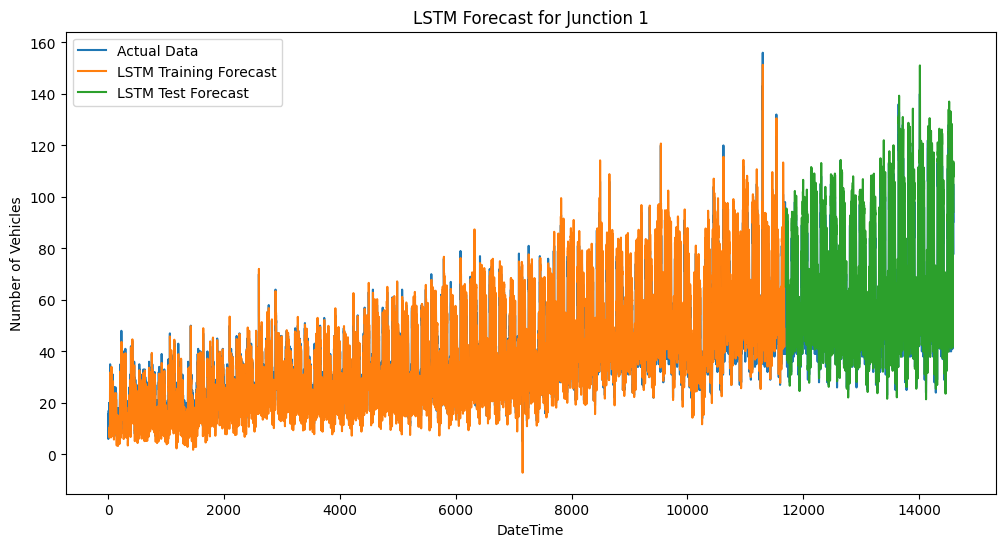

Train MSE: 33.34909722019241
Train MAE: 4.261842884123325
Train R²: 0.9095414786661069
Train MAPE: 0.11995032148235422
Test MSE: 73.5485988587905
Test MAE: 6.65890081454411
Test R²: 0.8686724307230366
Test MAPE: 0.10022213940353866


In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/traffic-prediction-dataset/traffic.csv'
df = pd.read_csv(file_path)

# Convert the DateTime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

# Set DateTime as the index
df.set_index('DateTime', inplace=True)

# Select data for a specific junction
junction = 1
df_junction = df[df['Junction'] == junction]['Vehicles']

# Prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
df_junction_scaled = scaler.fit_transform(df_junction.values.reshape(-1, 1))

# Split data into training and testing sets
train_size = int(len(df_junction_scaled) * 0.8)
train, test = df_junction_scaled[:train_size], df_junction_scaled[train_size:]

# Create dataset function
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 24
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=3)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Create a new dataframe to align the predictions with the dates
train_predict_plot = np.empty_like(df_junction_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

test_predict_plot = np.empty_like(df_junction_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1:len(df_junction_scaled) - 1, :] = test_predict

# Plot LSTM forecast
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df_junction_scaled), label='Actual Data')
plt.plot(train_predict_plot, label='LSTM Training Forecast')
plt.plot(test_predict_plot, label='LSTM Test Forecast')
plt.title('LSTM Forecast for Junction 1')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

# Performance evaluation
train_mse = mean_squared_error(y_train[0], train_predict)
train_mae = mean_absolute_error(y_train[0], train_predict)
test_mse = mean_squared_error(y_test[0], test_predict)
test_mae = mean_absolute_error(y_test[0], test_predict)

# Calculate R² score and MAPE for additional accuracy evaluation
train_r2 = r2_score(y_train[0], train_predict)
test_r2 = r2_score(y_test[0], test_predict)
train_mape = mean_absolute_percentage_error(y_train[0], train_predict)
test_mape = mean_absolute_percentage_error(y_test[0], test_predict)

print(f'Train MSE: {train_mse}')
print(f'Train MAE: {train_mae}')
print(f'Train R²: {train_r2}')
print(f'Train MAPE: {train_mape}')
print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')
print(f'Test R²: {test_r2}')
print(f'Test MAPE: {test_mape}')


In [11]:
# Persistence model (predict the previous hour's traffic volume)
y_test_persistence = df_junction.values[train_size + look_back:-1]
y_pred_persistence = df_junction.values[train_size + look_back - 1:-2]

# Calculate MSE and MAE for the persistence model
persistence_mse = mean_squared_error(y_test_persistence, y_pred_persistence)
persistence_mae = mean_absolute_error(y_test_persistence, y_pred_persistence)

print(f'Persistence Model MSE: {persistence_mse}')
print(f'Persistence Model MAE: {persistence_mae}')


Persistence Model MSE: 65.51105736005529
Persistence Model MAE: 6.2560469937802345


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/traffic-prediction-dataset/traffic.csv'
df = pd.read_csv(file_path)

# Convert the DateTime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

# Set DateTime as the index
df.set_index('DateTime', inplace=True)

# Select data for a specific junction
junction = 1
df_junction = df[df['Junction'] == junction]['Vehicles']

# Prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
df_junction_scaled = scaler.fit_transform(df_junction.values.reshape(-1, 1))

# Split data into training and testing sets
train_size = int(len(df_junction_scaled) * 0.8)
train, test = df_junction_scaled[:train_size], df_junction_scaled[train_size:]

# Create dataset function
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 24
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model with dropout
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with more epochs
model.fit(X_train, y_train, batch_size=1, epochs=100)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Create a new dataframe to align the predictions with the dates
train_predict_plot = np.empty_like(df_junction_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

test_predict_plot = np.empty_like(df_junction_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2):len(train_predict) + (look_back * 2) + len(test_predict), :] = test_predict

# Plot LSTM forecast
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df_junction_scaled), label='Actual Data')
plt.plot(train_predict_plot, label='LSTM Training Forecast')
plt.plot(test_predict_plot, label='LSTM Test Forecast')
plt.title('LSTM Forecast for Junction 1')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

# Performance evaluation
train_mse = mean_squared_error(y_train, train_predict)
train_mae = mean_absolute_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)
test_mae = mean_absolute_error(y_test, test_predict)

print(f'Train MSE with dropout: {train_mse}')
print(f'Train MAE with dropout: {train_mae}')
print(f'Test MSE with dropout: {test_mse}')
print(f'Test MAE with dropout: {test_mae}')


In [ ]:
# Persistence model (predict the previous hour's traffic volume)
y_test_persistence = df_junction.values[train_size + look_back:-1]
y_pred_persistence = df_junction.values[train_size + look_back - 1:-2]

# Calculate MSE and MAE for the persistence model
persistence_mse = mean_squared_error(y_test_persistence, y_pred_persistence)
persistence_mae = mean_absolute_error(y_test_persistence, y_pred_persistence)

print(f'Persistence Model MSE: {persistence_mse}')
print(f'Persistence Model MAE: {persistence_mae}')


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

# Load the dataset
file_path = '/kaggle/input/traffic-prediction-dataset/traffic.csv'
df = pd.read_csv(file_path)

# Convert the DateTime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

# Set DateTime as the index
df.set_index('DateTime', inplace=True)

# Select data for a specific junction
junction = 1
df_junction = df[df['Junction'] == junction]['Vehicles']

# Prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
df_junction_scaled = scaler.fit_transform(df_junction.values.reshape(-1, 1))

# Split data into training and testing sets
train_size = int(len(df_junction_scaled) * 0.8)
train, test = df_junction_scaled[:train_size], df_junction_scaled[train_size:]

# Create dataset function
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 24
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model with dropout and early stopping
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25, kernel_regularizer='l2'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, batch_size=1, epochs=100, validation_split=0.2, callbacks=[early_stop])

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Create a new dataframe to align the predictions with the dates
train_predict_plot = np.empty_like(df_junction_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

test_predict_plot = np.empty_like(df_junction_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2):len(train_predict) + (look_back * 2) + len(test_predict), :] = test_predict

# Plot LSTM forecast
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df_junction_scaled), label='Actual Data')
plt.plot(train_predict_plot, label='LSTM Training Forecast')
plt.plot(test_predict_plot, label='LSTM Test Forecast')
plt.title('LSTM Forecast for Junction 1')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

# Performance evaluation
train_mse = mean_squared_error(y_train, train_predict)
train_mae = mean_absolute_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)
test_mae = mean_absolute_error(y_test, test_predict)

print(f'Train MSE with dropout and early stopping: {train_mse}')
print(f'Train MAE with dropout and early stopping: {train_mae}')
print(f'Test MSE with dropout and early stopping: {test_mse}')
print(f'Test MAE with dropout and early stopping: {test_mae}')
